In [1]:
from modeling_utils import create_convolutional_architecture_for_psf_reconstruction, compile_model, train_model
from configurations import PSFConvolutionalConfiguration as ModelConfiguration
from data_utils import load_numpy_data, split_data

2024-01-10 11:09:10.385826: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 11:09:10.411646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 11:09:10.411666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 11:09:10.412339: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 11:09:10.416901: I tensorflow/core/platform/cpu_feature_guar

In [2]:
pl_outputs_filename = "../../Data/PSFReconstruction/outputflux.npy"
pl_inputs_filename = "../../Data/PSFReconstruction/inputs.npy"

inputs = load_numpy_data(pl_inputs_filename)
outputs = load_numpy_data(pl_outputs_filename)

input_train, input_val = split_data(inputs, 0.1)
output_train, output_val = split_data(outputs, 0.1)

In [3]:
model_configuration = ModelConfiguration()
print(model_configuration.get_description())


	=== PSFConvolutional ===
	*ARCHITECTURE HYPERPARAMETERS:
		-PSF Convolutional
		-Fully connected Layers: [2048, 2048, 2048, 2048, 2048]
		-Fully connected Activation: elu
		-Convolutional Layers: [512, 128, 32]
		-Convolutonal Kernels: [3, 3, 3]
		-Convolutional Activation: relu
		-Output Layer Activation: linear
		-Regularizer: None
		-Batch Normalization: True
		-Dropout: False 
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 100
		-Batch size: 16
		-Callbacks:
			-ReduceLROnPlateau: MSE 8 x0.1
			-Early Stop: MSE 15
	


2024-01-10 11:09:11.725206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-10 11:09:11.748280: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-10 11:09:11.748403: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
model = create_convolutional_architecture_for_psf_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "PSFConvolutional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19, 2048)          2048      
                                                                 
 batch_normalization (Batch  (None, 19, 2048)          8192      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 19, 2048)          0         
                                                                 
 dense_1 (Dense)             (None, 19, 2048)          4194304   
                                                                 
 batch_normalization_1 (Bat  (None, 19, 2048)          8192      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 19, 2048)     

In [5]:
model.summary()

Model: "PSFConvolutional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19, 2048)          2048      
                                                                 
 batch_normalization (Batch  (None, 19, 2048)          8192      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 19, 2048)          0         
                                                                 
 dense_1 (Dense)             (None, 19, 2048)          4194304   
                                                                 
 batch_normalization_1 (Bat  (None, 19, 2048)          8192      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 19, 2048)     

In [6]:
compile_model(model,
              *model_configuration.unpack_compilation_hyperparameters())

In [7]:
history = train_model(
	model,
	output_train,
	input_train,
	output_val,
	input_val,
	*model_configuration.unpack_training_hyperparameters())

Epoch 1/100


2024-01-10 11:09:13.660428: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-10 11:09:13.955371: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-10 11:09:14.017386: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-10 11:09:14.407173: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb450f81740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-10 11:09:14.407192: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-01-10 11:09:14.410570: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704845354.476498   24933 devic

5625/5625 [==============================] - 98s 17ms/step - loss: 1.6802 - mean_squared_error: 1.6802 - val_loss: 1.6665 - val_mean_squared_error: 1.6665 - lr: 0.0010
Epoch 2/100
5625/5625 [==============================] - 96s 17ms/step - loss: 1.6707 - mean_squared_error: 1.6707 - val_loss: 1.6631 - val_mean_squared_error: 1.6631 - lr: 0.0010
Epoch 3/100
5625/5625 [==============================] - 84s 15ms/step - loss: 1.6696 - mean_squared_error: 1.6696 - val_loss: 1.6631 - val_mean_squared_error: 1.6631 - lr: 0.0010
Epoch 4/100
5625/5625 [==============================] - 92s 16ms/step - loss: 1.6693 - mean_squared_error: 1.6693 - val_loss: 1.6639 - val_mean_squared_error: 1.6639 - lr: 0.0010
Epoch 5/100
5625/5625 [==============================] - 93s 17ms/step - loss: 1.6687 - mean_squared_error: 1.6687 - val_loss: 1.6628 - val_mean_squared_error: 1.6628 - lr: 0.0010
Epoch 6/100
5625/5625 [==============================] - 93s 17ms/step - loss: 1.6684 - mean_squared_error: 1.66

In [12]:
print(output_train[0])

[0.07136645 2.7617376  0.44538403 0.26226863 0.28303534 0.0168434
 0.9686056  0.02707414 0.23458928 0.65537524 0.0102895  1.9310666
 0.96066344 1.0809128  1.1842488  0.0473706  0.544333   0.29406866
 0.5592538 ]


In [22]:
import numpy as np
pred = model.predict(np.array([output_train[0]]))[0]

1/1 [==============================] - 0s 16ms/step


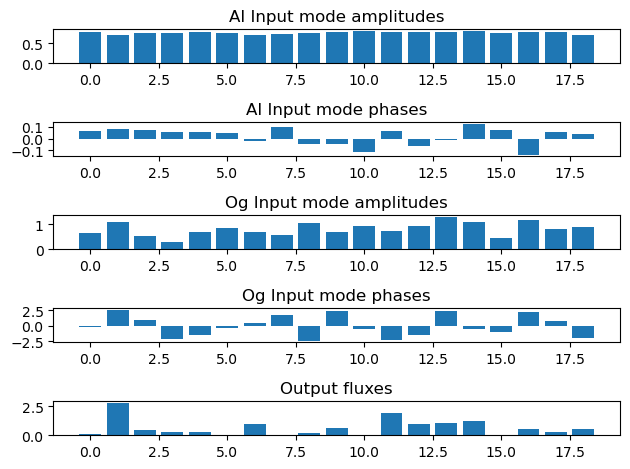

In [33]:
import matplotlib.pyplot as plt
# Plot input mode coefficients and output fluxes
xlabels = np.arange(len(output_train[0]))
plt.figure(1)
plt.clf()
plt.subplot(511)
plt.bar(xlabels, pred[:,0])
plt.title('AI Input mode amplitudes')
plt.subplot(512)
plt.bar(xlabels, pred[:,1])
plt.title('AI Input mode phases')
plt.subplot(513)
plt.bar(xlabels, input_train[0][:,0])
plt.title('Og Input mode amplitudes')
plt.subplot(514)
plt.bar(xlabels, input_train[0][:,1])
plt.title('Og Input mode phases')
plt.subplot(515)
plt.bar(xlabels, output_train[0])
plt.title('Output fluxes')
plt.tight_layout()